This file is used to generate Fig S1

Here, we assume that resistance is determined by either 5 loci, or 13 loci

In [2]:
from model import PModel

import numpy as np
from matplotlib import pyplot as plt

#Global parameters
p1 = 0.3        #Probability of first-order epistatic interaction
p2 = 0.3        #Probability of second-order epistatic interaction
sigma1 = 0.3    #Standard deviation for first-order epistasis
sigma2 = 0.3    #Standard deviation for second-order epistasis

In [3]:
#Compute the average Pareto front from a sequence of random genotype distributions
def pareto_array(n_loci, n_sims, n_steps=100, epi=0, beta=1):
	model = PModel(n_loci, np.zeros(n_loci), np.zeros(n_loci), beta=beta)

	coefs = np.zeros(n_sims)
	cost_grid = np.zeros((n_sims, n_steps))
	res_vals = np.linspace(0, 1, n_steps)

	for i in range(n_sims):
		cost = np.random.exponential(0.1, n_loci)
		res = np.random.exponential(0.1, n_loci)
		model.update_loci(res, cost)

		if epi == 1:
			model.add_epistasis(2, p1, sigma1)
		elif epi ==	2:
			model.add_epistasis(2, p1, sigma1)
			model.add_epistasis(3, p2, sigma2)

		model.normalize()

		res, fec = model.pareto()
		fec_interp = np.interp(res_vals, res, fec)

		coefs[i] = np.polyfit(1 - res, 1 - fec, 2)[0]
		cost_grid[i,:] = fec_interp

	cost_avg = np.average(cost_grid, axis=0)
	cost_std = np.std(cost_grid, axis=0)

	return cost_avg, cost_std, coefs

In [4]:
costs_5_epi_0, err_5_epi_0, _ = pareto_array(5, 100)
costs_5_epi_1, err_5_epi_1, _ = pareto_array(5, 100, epi=1)
costs_5_epi_2, err_5_epi_2, _ = pareto_array(5, 100, epi=2)

costs_13_epi_0, err_13_epi_0, _ = pareto_array(13, 100)
costs_13_epi_1, err_13_epi_1, _ = pareto_array(13, 100, epi=1)
costs_13_epi_2, err_13_epi_2, _ = pareto_array(13, 100, epi=2)

In [5]:
def label_x_ticks(ax, vals, n_ticks = 4):
    x_lim = ax.get_xlim()
    x_ticks = np.linspace(x_lim[0], x_lim[1], n_ticks)
    x_tick_labels = np.round(np.linspace(np.min(vals), np.max(vals), n_ticks), 3)

    ax.set_xticks(x_ticks, x_tick_labels)

def label_y_ticks(ax, vals, n_ticks = 4):
    y_lim = ax.get_ylim()
    y_ticks = np.linspace(y_lim[0], y_lim[1], n_ticks)
    y_tick_labels = np.round(np.linspace(np.min(vals), np.max(vals), n_ticks), 3)

    ax.set_yticks(y_ticks, y_tick_labels)

Text(-0.2, 1.1, 'F')

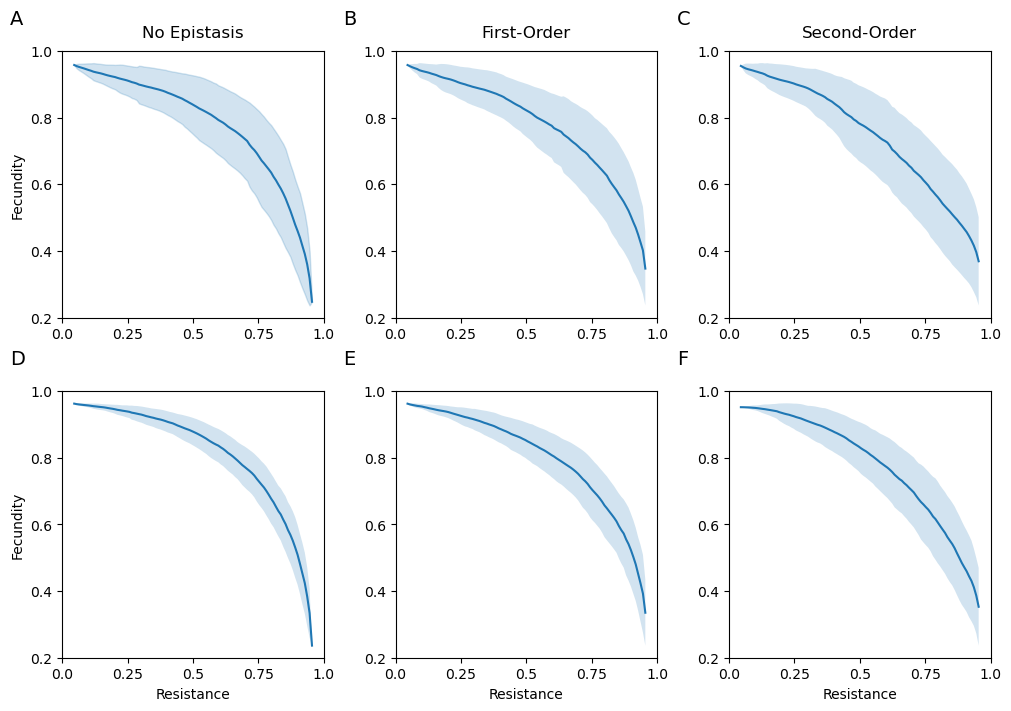

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10, 7), layout='constrained')

res_pts = np.linspace(0, 1, 100)

ax[0,0].set_title('No Epistasis', pad=10)
ax[0,1].set_title('First-Order', pad=10)
ax[0,2].set_title('Second-Order', pad=10)

ax[0,0].plot(1-res_pts, costs_5_epi_0)
ax[0,0].fill_between(1-res_pts, costs_5_epi_0-err_5_epi_0, costs_5_epi_0+err_5_epi_0, alpha=0.2, color='tab:blue')
ax[0,0].set_ylabel('Fecundity')

label_x_ticks(ax[0,0], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[0,0], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[0,1].plot(1-res_pts, costs_5_epi_1)
ax[0,1].fill_between(1-res_pts, costs_5_epi_1-err_5_epi_1, costs_5_epi_1+err_5_epi_1, alpha=0.2)

label_x_ticks(ax[0,1], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[0,1], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[0,2].plot(1-res_pts, costs_5_epi_2)
ax[0,2].fill_between(1-res_pts, costs_5_epi_2-err_5_epi_2, costs_5_epi_2+err_5_epi_2, alpha=0.2)

label_x_ticks(ax[0,2], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[0,2], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[1,0].plot(1-res_pts, costs_13_epi_0)
ax[1,0].fill_between(1-res_pts, costs_13_epi_0-err_13_epi_0, costs_13_epi_0+err_13_epi_0, alpha=0.2)
ax[1,0].set_xlabel('Resistance')
ax[1,0].set_ylabel('Fecundity')

label_x_ticks(ax[1,0], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[1,0], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[1,1].plot(1-res_pts, costs_13_epi_1)
ax[1,1].fill_between(1-res_pts, costs_13_epi_1-err_13_epi_1, costs_13_epi_1+err_13_epi_1, alpha=0.2)
ax[1,1].set_xlabel('Resistance')

label_x_ticks(ax[1,1], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[1,1], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[1,2].plot(1-res_pts, costs_13_epi_2)
ax[1,2].fill_between(1-res_pts, costs_13_epi_2-err_13_epi_2, costs_13_epi_2+err_13_epi_2, alpha=0.2)
ax[1,2].set_xlabel('Resistance')

label_x_ticks(ax[1,2], (0, 0.25, 0.5, 0.75, 1), 5)
label_y_ticks(ax[1,2], (0.2, 0.4, 0.6, 0.8, 1), 5)

ax[0,0].annotate("A", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)
ax[0,1].annotate("B", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)
ax[0,2].annotate("C", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)
ax[1,0].annotate("D", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)
ax[1,1].annotate("E", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)
ax[1,2].annotate("F", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=14)